In [1]:
# !pip install matplotlib

In [1]:
import import_ipynb
import matplotlib.pyplot as plt
import os
import re
import shutil
import string
import tensorflow as tf
from tensorflow.keras import regularizers



In [2]:
from tensorflow.keras import layers
from tensorflow.keras import losses

In [3]:
from collections import Counter

In [5]:
# !pip install pandas

In [4]:
import pandas as pd
import numpy as np

In [7]:
# !pip install sklearn

In [5]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [6]:
from tensorflow.keras import preprocessing
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [10]:
# pip install pydot

In [7]:
import pydot
import json

In [12]:
print(tf.__version__)

2.9.1


In [8]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

def remove_url(text): 
    url_pattern  = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    return url_pattern.sub(r'', text)
 # converting return value from list to string



def clean_text(text ): 
    delete_dict = {sp_character: '' for sp_character in string.punctuation} 
    delete_dict[' '] = ' ' 
    table = str.maketrans(delete_dict)
    text1 = text.translate(table)
    #print('cleaned:'+text1)
    textArr= text1.split()
    text2 = ' '.join([w for w in textArr if ( not w.isdigit() and  ( not w.isdigit() and len(w)>2))]) 
    
    return text2.lower()

In [9]:
train_data= pd.read_csv("X_train0.csv")
train_data.dropna(axis = 0, how ='any',inplace=True) 
train_data['Num_words_text'] = train_data['HEADLINE'].apply(lambda x:len(str(x).split())) 
mask = train_data['Num_words_text'] >2
train_data = train_data[mask]
print('-------Train data--------')
print(train_data['trend'].value_counts())
print(len(train_data))
print('-------------------------')
max_train_sentence_length  = train_data['Num_words_text'].max()


train_data['HEADLINE'] = train_data['HEADLINE'].apply(remove_emoji)
train_data['HEADLINE'] = train_data['HEADLINE'].apply(remove_url)
train_data['HEADLINE'] = train_data['HEADLINE'].apply(clean_text)


test_data= pd.read_csv("X_te0.csv")
test_data.dropna(axis = 0, how ='any',inplace=True) 
test_data['Num_words_text'] = test_data['HEADLINE'].apply(lambda x:len(str(x).split())) 

max_test_sentence_length  = test_data['Num_words_text'].max()

mask = test_data['Num_words_text'] >2
test_data = test_data[mask]

# print('-------Test data--------')
# print(test_data['trend'].value_counts())
# print(len(test_data))
# print('-------------------------')

test_data['HEADLINE'] = test_data['HEADLINE'].apply(remove_emoji)
test_data['HEADLINE'] = test_data['HEADLINE'].apply(remove_url)
test_data['HEADLINE'] = test_data['HEADLINE'].apply(clean_text)


print('Train Max Sentence Length :'+str(max_train_sentence_length))
print('Test Max Sentence Length :'+str(max_test_sentence_length))

-------Train data--------
bullish    718
bearish    625
Name: trend, dtype: int64
1343
-------------------------
Train Max Sentence Length :63
Test Max Sentence Length :56


In [16]:
train_data.head()


,DATE,HEADLINE,TICKER,COMPANY NAME,trend,Num_words_text
0,2022.07.23,yes bank reports earnings gross npa ₹27747 ₹27...,YESBANK,Yes Bank Limited,bearish,23
1,2022.09.05,tata motors launches new tippers trucks cngtru...,NDTV,New Delhi Television Limited,bearish,17
2,2022.07.09,sensex born published since january the base v...,ANDHRSUGAR,The Andhra Sugars Limited,bullish,27
3,2022.08.22,ford ford says cutting jobs canada and india,BANKINDIA,Bank of India,bullish,13
4,2022.08.04,blue star reports earnings net profit yoy reve...,BLUECOAST,Blue Coast Hotels Limited,bullish,44


In [14]:
test_data.head()

,Unnamed: 0,DATE,HEADLINE,TICKER,COMPANY NAME,Num_words_text
0,0,2022.10.16,government has far transferred lakh through di...,PFOCUS,Prime Focus Limited,26
1,1,2022.10.16,prime minister narendra modi launches digital ...,PFOCUS,Prime Focus Limited,11
2,2,2022.10.16,irdai increases penalty max life insurance max...,AXISBANK,Axis Bank Limited,50
3,3,2022.10.16,gtpl hathway reports earnings consolidated â–¶...,HATHWAY,Hathway Cable & Datacom Limited,49
4,4,2022.10.16,butterfly gandhimathi appliances reports earni...,BUTTERFLY,Butterfly Gandhimathi Appliances Limited,49


In [10]:
num_words = 20000

tokenizer = Tokenizer(num_words=num_words,oov_token="unk")
tokenizer.fit_on_texts(train_data['HEADLINE'].tolist())


print(str(tokenizer.texts_to_sequences(['xyz how are you'])))

[[1, 1, 71, 2335]]


In [11]:
X_train, X_valid, y_train, y_valid = train_test_split(train_data['HEADLINE'].tolist(),\
                                                      train_data['trend'].tolist(),\
                                                      test_size=0.1,\
                                                      stratify = train_data['trend'].tolist(),\
                                                      random_state=0)


print('Train data len:'+str(len(X_train)))
print('Class distribution'+str(Counter(y_train)))
print('Valid data len:'+str(len(X_valid)))
print('Class distribution'+ str(Counter(y_valid)))


x_train = np.array( tokenizer.texts_to_sequences(X_train) )
x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
x_test  = np.array( tokenizer.texts_to_sequences(test_data['HEADLINE'].tolist()) )



x_train = pad_sequences(x_train, padding='post', maxlen=40)
x_valid = pad_sequences(x_valid, padding='post', maxlen=40)
x_test = pad_sequences(x_test, padding='post', maxlen=40)

print(x_train[0])

le = LabelEncoder()

train_labels = le.fit_transform(y_train)
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
#print(train_labels)
valid_labels = le.transform(y_valid)
valid_labels = np.asarray( tf.keras.utils.to_categorical(valid_labels))

train_ds = tf.data.Dataset.from_tensor_slices((x_train,train_labels))
valid_ds = tf.data.Dataset.from_tensor_slices((x_valid,valid_labels))
# test_ds = tf.data.Dataset.from_tensor_slices((x_test,test_labels))

Train data len:1208
Class distributionCounter({'bullish': 646, 'bearish': 562})
Valid data len:135
Class distributionCounter({'bullish': 72, 'bearish': 63})
[1952   17    4    6   11    2   12    5    2   12    3    2   12   49
    2   12    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]


C:\Users\HOME\AppData\Local\Temp\ipykernel_8508\3781531204.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train = np.array( tokenizer.texts_to_sequences(X_train) )
C:\Users\HOME\AppData\Local\Temp\ipykernel_8508\3781531204.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_valid = np.array( tokenizer.texts_to_sequences(X_valid) )
C:\Users\HOME\AppData\Local\Temp\ipykernel_8508\3781531204.py:16: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with differen

In [19]:
print(y_train[:10])
train_labels = le.fit_transform(y_train)
print('Text to number')
print(train_labels[:10])
train_labels = np.asarray( tf.keras.utils.to_categorical(train_labels))
print('Number to category')
print(train_labels[:10])

['bullish', 'bearish', 'bullish', 'bearish', 'bearish', 'bearish', 'bullish', 'bearish', 'bullish', 'bullish']
Text to number
[1 0 1 0 0 0 1 0 1 1]
Number to category
[[0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]]


In [12]:
count =0
print('======Train dataset ====')
for value,label in train_ds:
    count += 1
    print(value,label)
    if count==3:
        break
count =0
print('======Validation dataset ====')
for value,label in valid_ds:
    count += 1
    print(value,label)
    if count==3:
        break
# print('======Test dataset ====')
# for value,label in test_ds:
#     count += 1
#     print(value,label)
#     if count==3:
#         break  

======Train dataset ====
tf.Tensor(
[1952   17    4    6   11    2   12    5    2   12    3    2   12   49
    2   12    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0], shape=(40,), dtype=int32) tf.Tensor([0. 1.], shape=(2,), dtype=float32)
tf.Tensor(
[1065   47   38   40   24   28   25 4939   27   51   53  207 4940    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0], shape=(40,), dtype=int32) tf.Tensor([1. 0.], shape=(2,), dtype=float32)
tf.Tensor(
[ 191  399 1524   72   69  126   47  463  925  450  178  756    7  996
  758  574 1104 1035  178  304  532  358  578 4367 4368  389  331  252
 4369 1085  631  234    7  535   19 4370    0    0    0    0], shape=(40,), dtype=int32) tf.Tensor([0. 1.], shape=(2,), dtype=float32)
======Validation dataset ====
tf.Tensor(
[4454 4455    4    6   11    2   11   12    5   11    2   11   12    3

In [13]:
max_features =20000
embedding_dim =64
sequence_length = 40

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(max_features +1, embedding_dim, input_length=sequence_length,\
                                    embeddings_regularizer = regularizers.l2(0.0005)))                                    

model.add(tf.keras.layers.Conv1D(128,3, activation='relu',\
                                 kernel_regularizer = regularizers.l2(0.0005),\
                                 bias_regularizer = regularizers.l2(0.0005)))                               


model.add(tf.keras.layers.GlobalMaxPooling1D())

model.add(tf.keras.layers.Dropout(0.5))

model.add(tf.keras.layers.Dense(2, activation='sigmoid',\
                                kernel_regularizer=regularizers.l2(0.001),\
                                bias_regularizer=regularizers.l2(0.001),))
                               



model.summary()
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer='Nadam', metrics=["CategoricalAccuracy"])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 64)            1280064   
                                                                 
 conv1d (Conv1D)             (None, 38, 128)           24704     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 1,305,026
Trainable params: 1,305,026
Non-trainable params: 0
______________________________________________

In [22]:
# pip install pydotplus

In [23]:
# pip install graphviz

In [24]:
tf.keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


lets train

In [25]:
epochs = 4
# Fit the model using the train and test datasets.
#history = model.fit(x_train, train_labels,validation_data= (x_test,test_labels),epochs=epochs )
history = model.fit(train_ds.shuffle(2000).batch(32),
                    epochs= epochs ,
                    validation_data=valid_ds.batch(32),
                    verbose=1)

Epoch 1/4


C:\Users\HOME\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\util\dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


38/38 [==============================] - 4s 45ms/step - loss: 0.9820 - categorical_accuracy: 0.5215 - val_loss: 0.8058 - val_categorical_accuracy: 0.5630
Epoch 2/4
38/38 [==============================] - 1s 32ms/step - loss: 0.7577 - categorical_accuracy: 0.5621 - val_loss: 0.7497 - val_categorical_accuracy: 0.5556
Epoch 3/4
38/38 [==============================] - 1s 31ms/step - loss: 0.7189 - categorical_accuracy: 0.6465 - val_loss: 0.7398 - val_categorical_accuracy: 0.5630
Epoch 4/4
38/38 [==============================] - 1s 32ms/step - loss: 0.6875 - categorical_accuracy: 0.6788 - val_loss: 0.7405 - val_categorical_accuracy: 0.5630


In [26]:
history.history

{'loss': [0.9820079803466797,
  0.7577383518218994,
  0.7188676595687866,
  0.6875152587890625],
 'categorical_accuracy': [0.5215231776237488,
  0.5620861053466797,
  0.6465231776237488,
  0.6788079738616943],
 'val_loss': [0.8057613372802734,
  0.7496600151062012,
  0.7398346066474915,
  0.7404726147651672],
 'val_categorical_accuracy': [0.5629629492759705,
  0.5555555820465088,
  0.5629629492759705,
  0.5629629492759705]}

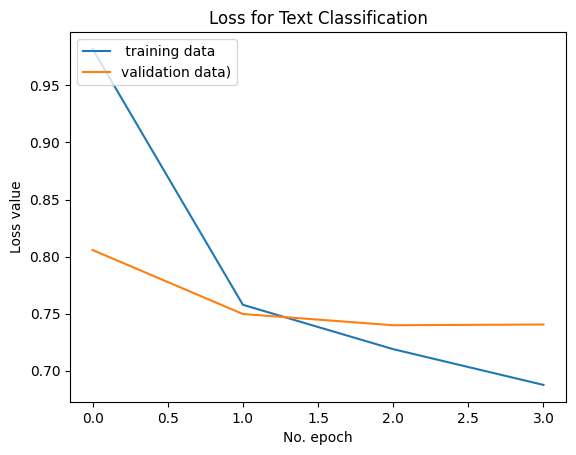

In [27]:
plt.plot(history.history['loss'], label=' training data')
plt.plot(history.history['val_loss'], label='validation data)')
plt.title('Loss for Text Classification')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

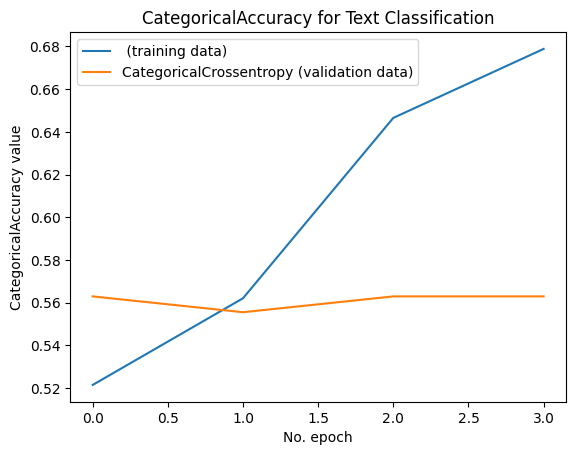

In [28]:
plt.plot(history.history['categorical_accuracy'], label=' (training data)')
plt.plot(history.history['val_categorical_accuracy'], label='CategoricalCrossentropy (validation data)')
plt.title('CategoricalAccuracy for Text Classification')
plt.ylabel('CategoricalAccuracy value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [29]:
model.save('C:\\Users\\HOME\\Desktop\\New Project\\cnnmodel') 
json_string = tokenizer.to_json()

INFO:tensorflow:Assets written to: C:\Users\HOME\Desktop\New Project\cnnmodel\assets


INFO:tensorflow:Assets written to: C:\Users\HOME\Desktop\New Project\cnnmodel\assets


In [14]:
import json
with open('C:\\Users\\HOME\\Desktop\\New Project\\tokenizer.json', 'w') as outfile:
    json.dump(json_string, outfile)

NameError: name 'json_string' is not defined

In [15]:
new_model = tf.keras.models.load_model('C:\\Users\\HOME\\Desktop\\New Project\\cnnmodel')
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 64)            1280064   
                                                                 
 conv1d (Conv1D)             (None, 38, 128)           24704     
                                                                 
 global_max_pooling1d (Globa  (None, 128)              0         
 lMaxPooling1D)                                                  
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 1,305,026
Trainable params: 1,305,026
Non-trainable params: 0
______________________________________________

In [16]:
with open('C:\\Users\\HOME\\Desktop\\New Project\\tokenizer.json') as json_file:
    json_string = json.load(json_file)
tokenizer1 = tf.keras.preprocessing.text.tokenizer_from_json(json_string)

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [17]:
print("Generate predictions for all samples")
predictions = new_model.predict(x_test)
print(predictions)
predict_results = predictions.argmax(axis=1)

Generate predictions for all samples
15/15 [==============================] - 1s 12ms/step
[[0.46717042 0.51106393]
 [0.49459183 0.47332913]
 [0.48705766 0.48112616]
 [0.5182087  0.4476245 ]
 [0.52284575 0.44229004]
 [0.5128366  0.4508149 ]
 [0.491053   0.4795829 ]
 [0.49742737 0.47429842]
 [0.48245934 0.48532417]
 [0.44188806 0.52942145]
 [0.43422407 0.5402237 ]
 [0.5072856  0.46314564]
 [0.4704565  0.49230972]
 [0.47112557 0.5019257 ]
 [0.53094935 0.43802893]
 [0.45574814 0.50153637]
 [0.50560373 0.4626951 ]
 [0.48874426 0.48226535]
 [0.53094935 0.43802893]
 [0.5061467  0.45646042]
 [0.4693933  0.507543  ]
 [0.45341748 0.52450776]
 [0.45772532 0.5199716 ]
 [0.44496262 0.52654034]
 [0.5127328  0.44855168]
 [0.48572055 0.483921  ]
 [0.49428278 0.4736115 ]
 [0.4898312  0.4801197 ]
 [0.44263527 0.5277967 ]
 [0.46426812 0.50618315]
 [0.46028253 0.5094733 ]
 [0.46028253 0.5094733 ]
 [0.46028253 0.5094733 ]
 [0.46028253 0.5094733 ]
 [0.46073166 0.50675654]
 [0.46073166 0.50675654]
 [0.46073

 [0.47774962 0.49073124]]


In [18]:
test_data['pred_sentiment']= predict_results


In [36]:
# labels = [1,0]
    
# print(classification_report(pr,ytest,labels=labels))

In [19]:
predict_results

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,

In [24]:
y_test=pd.read_csv('Y_te0.csv')

In [25]:
y=y_test.trend.values

In [26]:
pr=predict_results

In [27]:
len(pr)

471

In [28]:
len(y)

471

In [29]:
ytest=[]
for i in range(len(pr)):
    if(y[i]=='bearish'):
        ytest.append(0)
    else:
        ytest.append(1)


In [30]:
res=0
for i in range(len(pr)):
    if(ytest[i]==pr[i]):
        res=res+1
       


In [31]:
res

283

In [32]:
capable = res/len(pr)
print ("No. of dataset can be predicted : ",capable)

No. of dataset can be predicted :  0.6008492569002123


In [33]:
com=pd.read_csv('com.csv')

In [34]:
compound=com.compound_score.values

In [35]:
com_pre=[]
for i in range(len(compound)):
    if(compound[i]<0):
        com_pre.append(0)
    elif(compound[i]>0):
        com_pre.append(1)
    else:
        com_pre.append(-1)


In [36]:
total=0
resu=0
actual=0
for i in range(len(com_pre)):
    if(com_pre[i]==pr[i] and pr[i]==ytest[i]):
        resu=resu+1
        total=total+1
    elif(com_pre[i]==pr[i] and pr[i]!=ytest[i]):
        total=total+1
    elif(com_pre[i]==pr[i] and com_pre[i]!=-1):
        total=total+1
    
        

In [37]:
print ("Accuray over the predicted data : ",resu/total)

Accuray over the predicted data :  0.6707317073170732


In [46]:
pre

NameError: name 'pre' is not defined

In [39]:
results = []
results.append(pr)
results.append(com_pre)
results.append(pred)
results.append(ytest)

NameError: name 'pred' is not defined

In [40]:
import pandas as pd

In [41]:
df=pd.DataFrame(test_data.HEADLINE.values,columns=['Headlines'])

In [47]:
df['Neural Network prediction']=pr
df['Emperical Weight prediction']=com_pre
df['Predicted trend']=pr
df['Actual trend']=ytest

In [48]:
df.head(50)

,Headlines,Neural Network prediction,Emperical Weight prediction,Predicted trend,Actual trend
0,government has far transferred lakh through di...,1,1,1,0
1,prime minister narendra modi launches digital ...,0,-1,0,0
2,irdai increases penalty max life insurance max...,0,0,0,1
3,gtpl hathway reports earnings consolidated â–¶...,0,1,0,0
4,butterfly gandhimathi appliances reports earni...,0,1,0,0
5,kesoram industries reports earnings â–¶ï¸net ...,0,0,0,0
6,avenue supermarts reports earnings â–¶ï¸net p...,0,1,0,0
7,ahluwalia contracts india secures order worth ...,0,1,0,0
8,ganesh housing corporation reports earnings co...,1,1,1,1
9,tvs motors updated that acquisition stake tran...,1,-1,1,1


In [52]:
arr[0][0]

'government has far transferred lakh through direct benefit transfer another instalment kisan will transferred tomorrow says prime minister narendramodi'

In [49]:
arr=np.array(df)

In [45]:
for i in range(len(arr)):
    if(arr[0][0]==)

,Headlines,Neural Network prediction,Emperical Weight prediction
0,government has far transferred lakh through di...,1,1
1,prime minister narendra modi launches digital ...,0,-1
2,irdai increases penalty max life insurance max...,0,0
3,gtpl hathway reports earnings consolidated â–¶...,0,1
4,butterfly gandhimathi appliances reports earni...,0,1


In [55]:
df.to_csv('resultsec.csv')